# 此文件对高预算电影进行数据分析

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
import math
from wordcloud import WordCloud
from scipy import stats
from collections import Counter
from math import isnan
%matplotlib inline
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [2]:
#载入训练数据
ftrain_data="high_train.csv"
# ftrain_data="train.csv"
train_data = pd.read_csv(ftrain_data, index_col=False, low_memory=False)
train_data.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   6                                                NaN   8000000   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 16, 'name': 'Animation'}, {'id': 12, '...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt0093743                en   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4    Pinocchio and the Emperor of the Night   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...        6.58  ...   
1  Mia Thermopolis is now a college graduate and ...        8.25  ...   
2  Under the direction of a ruthless instructor, ...       64.30  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...        3.17  ...   
4  Pinocchio and his friends, a glow worm and a m...        0.74  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15   93.00           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04  113.00           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14  105.00           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12  122.00  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       8/6/87   83.00           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4    Pinocchio and the Emperor of the Night   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 6, 'character': 'Pinocchio (voice...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

In [3]:
# 查看数据维度信息
train_data.shape

(1695, 23)

In [4]:
# 查看数据信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1695 non-null   int64  
 1   belongs_to_collection  404 non-null    object 
 2   budget                 1695 non-null   int64  
 3   genres                 1693 non-null   object 
 4   homepage               627 non-null    object 
 5   imdb_id                1695 non-null   object 
 6   original_language      1695 non-null   object 
 7   original_title         1695 non-null   object 
 8   overview               1691 non-null   object 
 9   popularity             1695 non-null   float64
 10  poster_path            1695 non-null   object 
 11  production_companies   1653 non-null   object 
 12  production_countries   1686 non-null   object 
 13  release_date           1695 non-null   object 
 14  runtime                1694 non-null   float64
 15  spok

In [5]:
# 数据集含义
# 列名--------------------含义
# id                        标识号
# belongs_to_collection     属于某一类收藏
# budget                    预算（美元）
# genres                    风格列表
# homepage                  电影首页的 URL
# imdb_id                   IMDB 标识号
# original_language         原始语言
# original_title            原始电影名称
# overview                  剧情摘要
# popularity                受欢迎程度
# poster_path               海报url路径
# production_companies      制作电影公司
# production_countries      制作国家
# release_date              首次上映日期
# runtime                   电影时长
# spoken_languages          输出语言
# status                    电影状态（已发行等）
# tagline                   电影的标语
# title                     电影名称
# Keywords                  与电影相关的关键字
# cast                      演员列表
# crew                      剧组
# revenue                   收入（美元）

In [6]:
# 查看数据特殊值情况
train_data.nunique()

id                       1695
belongs_to_collection     296
budget                    273
genres                    624
homepage                  623
imdb_id                  1695
original_language          24
original_title           1686
overview                 1691
popularity               1695
poster_path              1695
production_companies     1409
production_countries      217
release_date             1478
runtime                   124
spoken_languages          261
status                      1
tagline                  1480
title                    1683
Keywords                 1578
cast                     1686
crew                     1686
revenue                  1645
dtype: int64

In [7]:
# 查看数据缺失值情况
train_data.isnull().sum()

id                          0
belongs_to_collection    1291
budget                      0
genres                      2
homepage                 1068
imdb_id                     0
original_language           0
original_title              0
overview                    4
popularity                  0
poster_path                 0
production_companies       42
production_countries        9
release_date                0
runtime                     1
spoken_languages            3
status                      0
tagline                   212
title                       0
Keywords                   95
cast                        8
crew                        9
revenue                     0
dtype: int64

In [8]:
# 查看数据均值等情况
train_data.describe()

id       budget  popularity  runtime       revenue
count 1695.00      1695.00     1695.00  1694.00       1695.00
mean  1259.18  32950553.02       10.30   110.74   93819820.11
std    725.21  40968250.20       15.27    22.50  159333633.51
min      1.00   1000000.00        0.01     0.00          6.00
25%    627.00   7000000.00        5.88    96.00    9314221.00
50%   1265.00  18000000.00        8.59   106.00   34533783.00
75%   1888.50  40000000.00       11.84   121.00  109589307.00
max   2500.00 380000000.00      294.34   338.00 1519557910.00

## 探索式数据挖掘 

**首先探索数值属性对票房的影响**  
**(1) budget**

In [9]:
train_data['revenue'].isnull().sum()

0

In [10]:
train_data['budget'].isnull().sum()

0

<AxesSubplot:xlabel='budget', ylabel='revenue'>

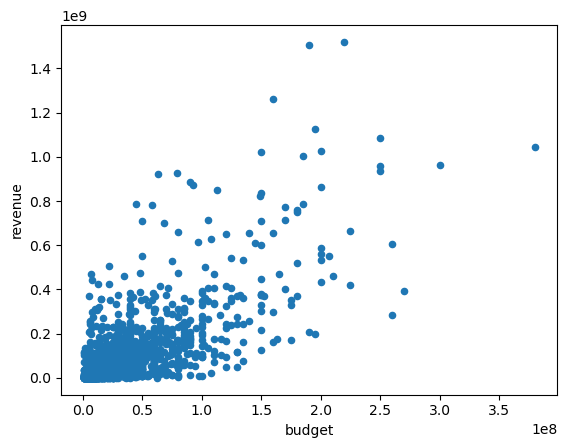

In [11]:
""" 
可视化 budget 与 revenue 之间的散点图
"""
train_data.plot.scatter('budget','revenue')

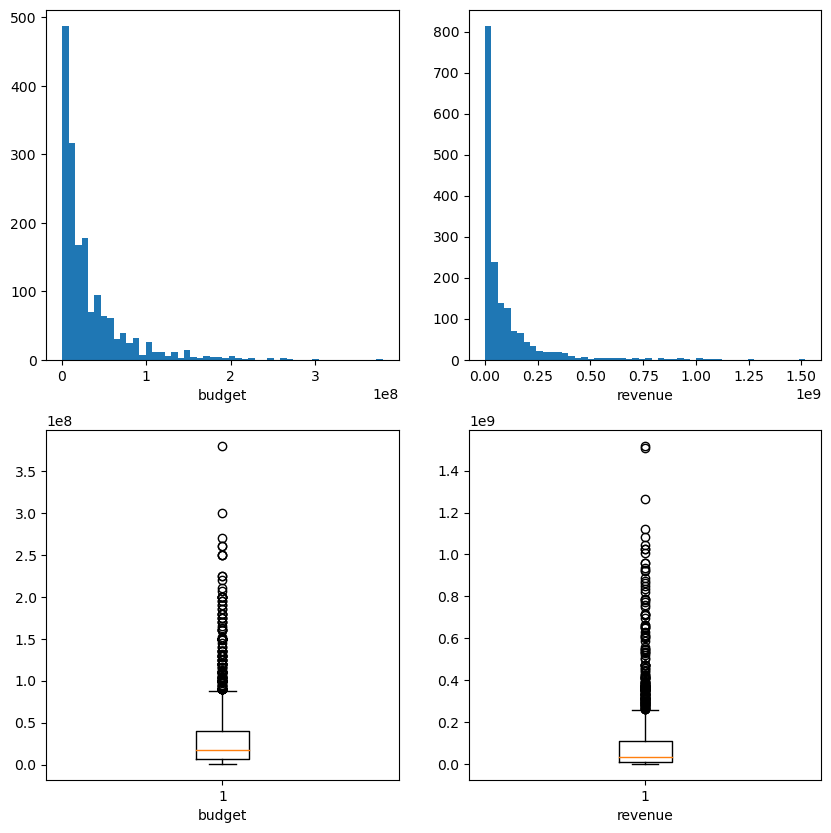

In [12]:
"""
可视化budget和revenue的数据特征
"""

attri1 = "budget"
attri2 = "revenue"

# coding=utf-8
plt.figure(figsize = (10,10))

# budget直方图
plt.subplot(2,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# revenue直方图
plt.subplot(2,2,2)
title = attri2
plt.xlabel(title)
plt.hist(train_data[attri2],bins = 50)

# budget盒图
plt.subplot(2,2,3)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])

# revenue盒图
plt.subplot(2,2,4)
title = attri2
plt.xlabel(title)
plt.boxplot(train_data[attri2])


plt.show()

**这两个属性存在严重的数据分布不均匀现象（低值数据多，高值数据少）**  
**尝试用log将其均匀化**  

In [13]:
# 尝试对 budget 和 revenue 做log变换
train_data['log_budget'] = np.log1p(train_data['budget'])
train_data['log_revenue'] = np.log1p(train_data['revenue'])

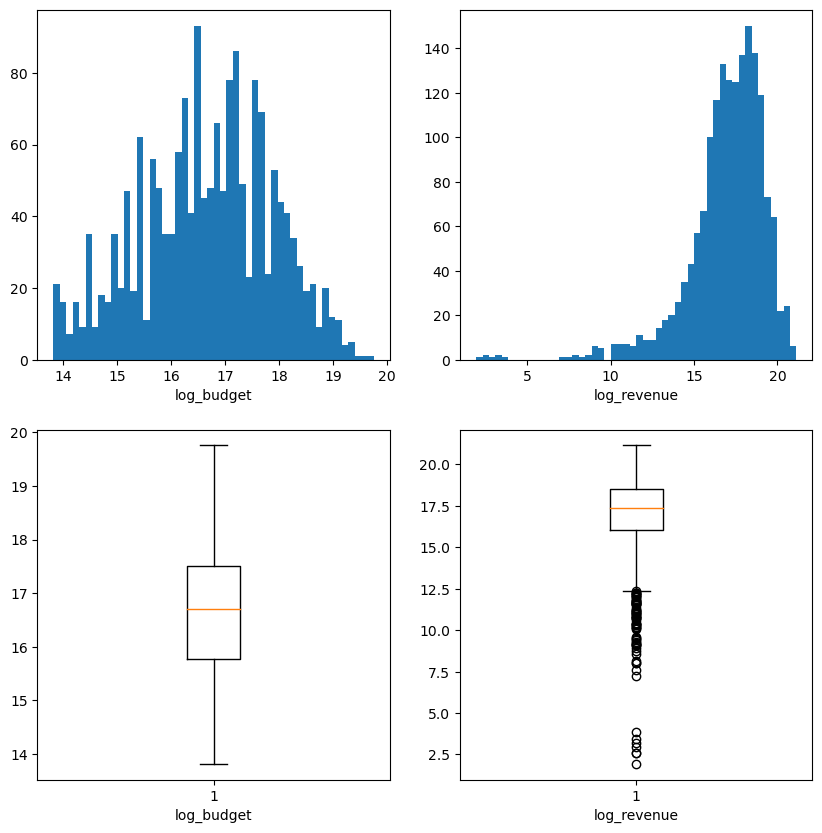

In [14]:
"""
可视化 log_budget 和 log_revenue 的数据特征
"""

attri1 = "log_budget"
attri2 = "log_revenue"

# coding=utf-8
plt.figure(figsize = (10,10))

# budget直方图
plt.subplot(2,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# revenue直方图
plt.subplot(2,2,2)
title = attri2
plt.xlabel(title)
plt.hist(train_data[attri2],bins = 50)

# budget盒图
plt.subplot(2,2,3)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])

# revenue盒图
plt.subplot(2,2,4)
title = attri2
plt.xlabel(title)
plt.boxplot(train_data[attri2])


plt.show()

<AxesSubplot:xlabel='log_budget', ylabel='log_revenue'>

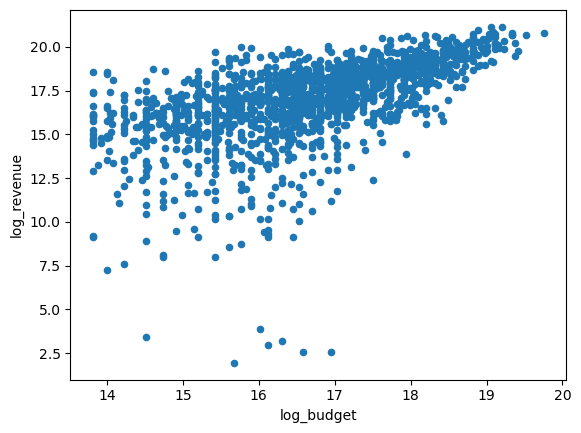

In [15]:
"""
可视化 log_budget 与 log_revenue 之间的散点图
"""
train_data.plot.scatter('log_budget','log_revenue')

**可以看出 log_revenue 与 log_budget 之间存在较强的相关关系**  

**(2) popularity**

In [16]:
train_data['popularity'].isnull().sum()

0

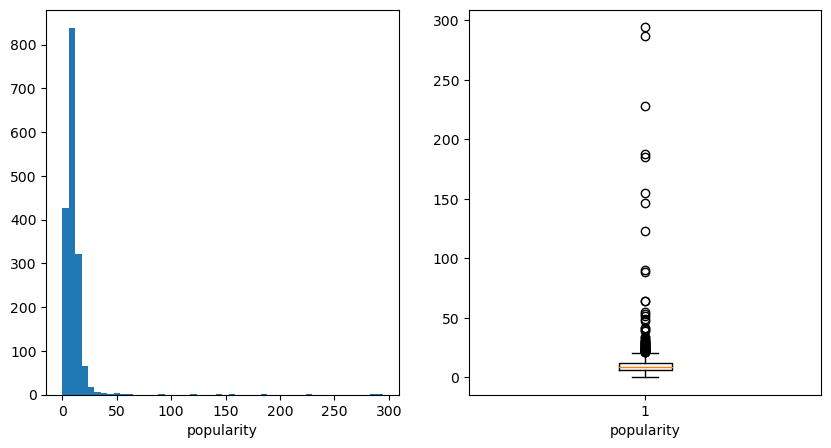

In [17]:
"""
可视化 popularity 数据特征
"""

attri1 = "popularity"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

In [18]:
# 尝试对 popularity 做log变换
train_data['log_popularity'] = np.log1p(train_data['popularity'])

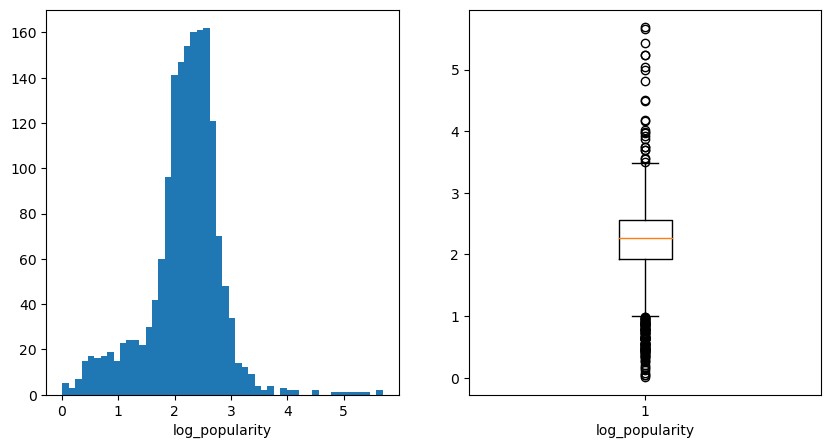

In [19]:
"""
可视化 log_popularity 数据特征
"""

attri1 = "log_popularity"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

<AxesSubplot:xlabel='log_popularity', ylabel='log_revenue'>

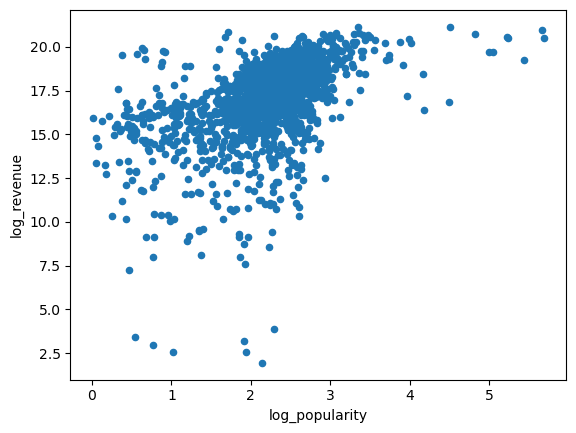

In [20]:
"""
可视化 log_popularity 与 log_revenue 之间的散点图
"""
train_data.plot.scatter('log_popularity','log_revenue')

**由散点图可知： log_revenue 与 log_popularity 有着一定的相关关系。**  

**(3) runtime**

In [21]:
train_data['runtime'].isnull().sum()

1

In [22]:
train_data[train_data['runtime'] == 0].shape

(4, 26)

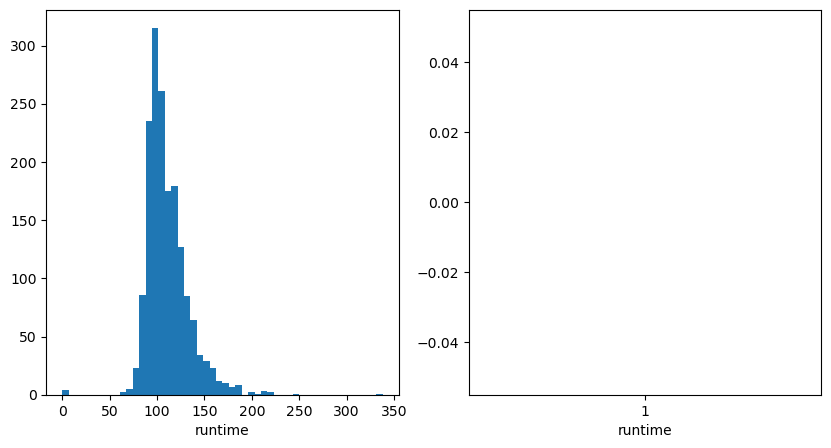

In [23]:
"""
可视化 runtime 数据特征
"""

attri1 = "runtime"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

**电影时长大体遵循正态分布**  
**可以尝试用均值填补缺失值和零值**  

In [24]:
train_data['runtime'] = train_data['runtime'].fillna(train_data['runtime'].mean())
train_data['runtime'].isnull().sum()

0

In [25]:
train_data['runtime'] = train_data['runtime'].replace(0, train_data['runtime'].mean())
train_data[train_data['runtime'] == 0].shape

(0, 26)

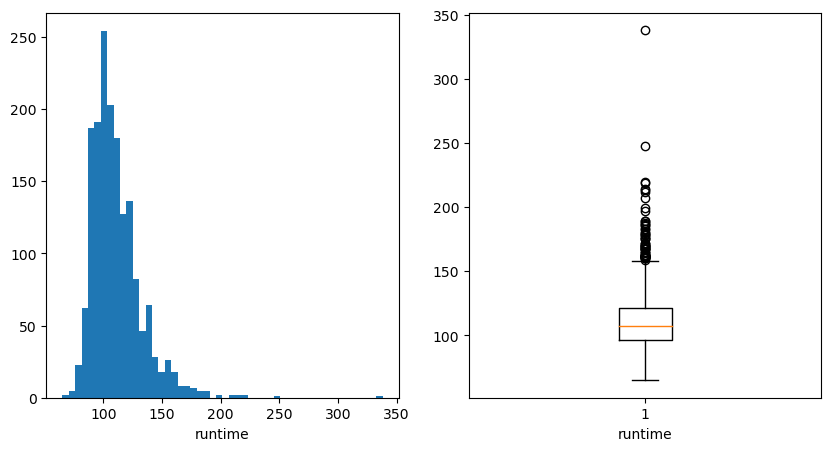

In [26]:
"""
可视化 runtime 数据特征
"""

attri1 = "runtime"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

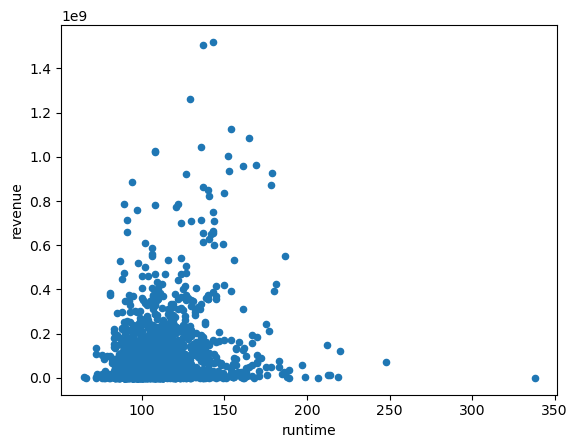

In [27]:
"""
可视化 runtime 与 revenue 之间的散点图
"""
train_data.plot.scatter('runtime','revenue')

**(4) homepage, poster_path**  
  
  

In [28]:
train_data['homepage'].isnull().sum()

1068

In [29]:
train_data['poster_path'].isnull().sum()

0

**poster_path该属性的有无对分析作用不大。故将其删除**  

In [30]:
train_data.drop(['poster_path'], axis=1, inplace=True)

**homepage大部分缺失，分析有无homepage对票房收入的影响**  

In [31]:
"""
构建二值属性
"""
train_data['has_homepage'] = 0
train_data.loc[train_data['homepage'].isnull() == False, 'has_homepage'] = 1

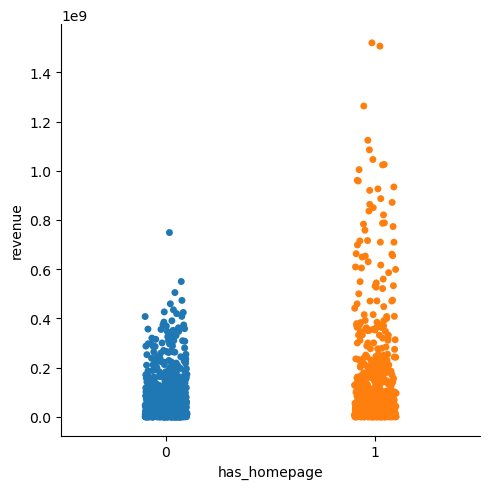

In [32]:
"""
可视化 has_homepage 与 revenue 之间的散点图
"""
sns.catplot(x='has_homepage',y='revenue',data=train_data)

In [33]:
has_homepage = train_data[train_data['has_homepage'] == 1]
has_homepage['revenue'].describe()

count          627.00
mean     151088568.39
std      225334814.26
min             46.00
25%       14292225.50
50%       66000000.00
75%      176030560.50
max     1519557910.00
Name: revenue, dtype: float64

In [34]:
no_homepage = train_data[train_data['has_homepage'] == 0]
no_homepage['revenue'].describe()

count        1068.00
mean     60198560.58
std      86354131.74
min             6.00
25%       7886750.00
50%      24781487.50
75%      78280421.25
max     748806957.00
Name: revenue, dtype: float64

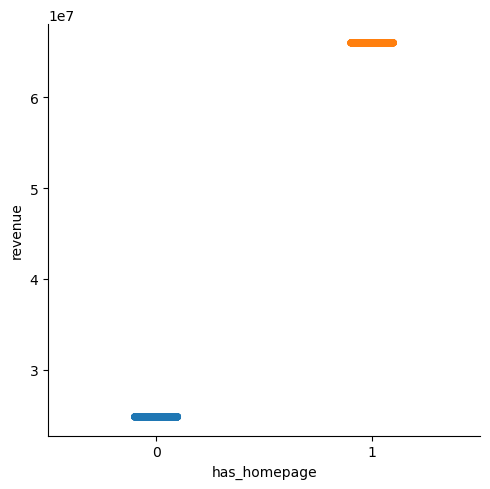

In [35]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["has_homepage"] == i]
#     mean.append(data['revenue'].mean())
    mean.append(data['revenue'].median())

    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["has_homepage"] == i,'revenue'] = mean[i]
sns.catplot(x='has_homepage',y='revenue',data=data)

In [36]:
#homepage作为无效属性，删除该属性
train_data.drop(['homepage'], axis=1, inplace=True)
train_data.head(2)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   

                                              genres    imdb_id  \
0                     [{'id': 35, 'name': 'Comedy'}]  tt2637294   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  tt0368933   

  original_language                            original_title  \
0                en                    Hot Tub Time Machine 2   
1                en  The Princess Diaries 2: Royal Engagement   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...        6.58   
1  Mia Thermopolis is now a college graduate and ...        8.25   

                                production_companies  ...  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  ...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]  ...   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                crew   revenue log_budget  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651      16.45   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435      17.50   

  log_revenue log_popularity has_homepage  
0       16.33           2.02            0  
1       18.37           2.22            0  

[2 rows x 25 columns]

**从散点图和数据特征来看，有电影首页URL的电影票房一般要高于无电影首页URL的电影**  

**(5) imdb_id, original_title, title, overview**  

**imdb_id, original_title, title 等属性对分析无意义，删除该属性**  

In [37]:
train_data.drop(['imdb_id'], axis=1, inplace=True)
train_data.drop(['original_title'], axis=1, inplace=True)
train_data.drop(['title'], axis=1, inplace=True)

In [38]:
"""
查看 overview 属性缺失情况
"""
train_data['overview'].isnull().sum()

4

**极少量缺失，对数据分析没有意义，删除该属性**

In [39]:
train_data.drop(['overview'], axis=1, inplace=True)
train_data.head(2)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   

                                              genres original_language  \
0                     [{'id': 35, 'name': 'Comedy'}]                en   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                en   

   popularity                               production_companies  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   113.00   

   ...    status                                            tagline  \
0  ...  Released  The Laws of Space and Time are About to be Vio...   
1  ...  Released  It can take a lifetime to find true love; she'...   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                crew   revenue  log_budget  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651       16.45   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435       17.50   

   log_revenue  log_popularity  has_homepage  
0        16.33            2.02             0  
1        18.37            2.22             0  

[2 rows x 21 columns]

**(6) release_date**  

In [40]:
train_data['release_date'].isnull().sum()

0

In [41]:
"""
将数据集中的发行日期分解为年、月、日（星期）等属性
"""
train_data['release_date'] = pd.to_datetime(train_data['release_date'], format='%m/%d/%y')
train_data["release_year"] = pd.to_datetime(train_data["release_date"]).dt.year.astype(int)
train_data["release_day"] = pd.to_datetime(train_data["release_date"]).dt.dayofweek.astype(int)
train_data["release_month"] = pd.to_datetime(train_data["release_date"]).dt.month.astype(int)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1695 non-null   int64         
 1   belongs_to_collection  404 non-null    object        
 2   budget                 1695 non-null   int64         
 3   genres                 1693 non-null   object        
 4   original_language      1695 non-null   object        
 5   popularity             1695 non-null   float64       
 6   production_companies   1653 non-null   object        
 7   production_countries   1686 non-null   object        
 8   release_date           1695 non-null   datetime64[ns]
 9   runtime                1695 non-null   float64       
 10  spoken_languages       1692 non-null   object        
 11  status                 1695 non-null   object        
 12  tagline                1483 non-null   object        
 13  Key

**由于数据集是2019年收集的，年份不应晚于2019**  

In [42]:
train_data['release_year'].max()

2068

In [43]:
def fix_year(x):
    if x > 2019:
        return x - 100
    else:
        return x 

train_data['release_year'] = train_data['release_year'].apply(lambda x: fix_year(x))

In [44]:
train_data['release_year'].max()

2017

In [45]:
train_data.head(2)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   

                                              genres original_language  \
0                     [{'id': 35, 'name': 'Comedy'}]                en   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                en   

   popularity                               production_companies  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2015-02-20    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2004-08-06   113.00   

   ...                                               cast  \
0  ...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  ...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                crew   revenue log_budget  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651      16.45   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435      17.50   

  log_revenue log_popularity  has_homepage  release_year  release_day  \
0       16.33           2.02             0          2015            4   
1       18.37           2.22             0          2004            4   

   release_month  
0              2  
1              8  

[2 rows x 24 columns]

**day**  

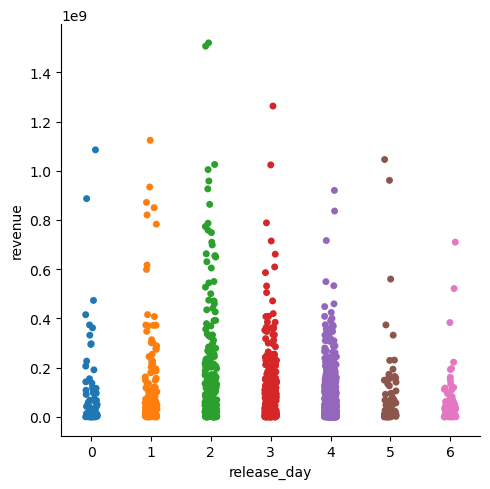

In [46]:
"""
可视化 release_day 与 revenue 之间的散点图
"""
sns.catplot(x='release_day',y='revenue',data=train_data)

<AxesSubplot:>

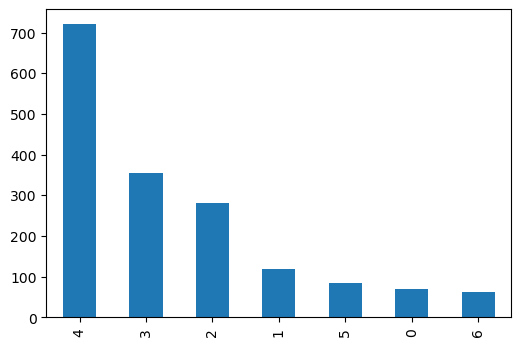

In [47]:
"""
可视化 release_day 的频数变化
"""
train_data["release_day"].value_counts().plot(kind="bar",figsize=(6,4))

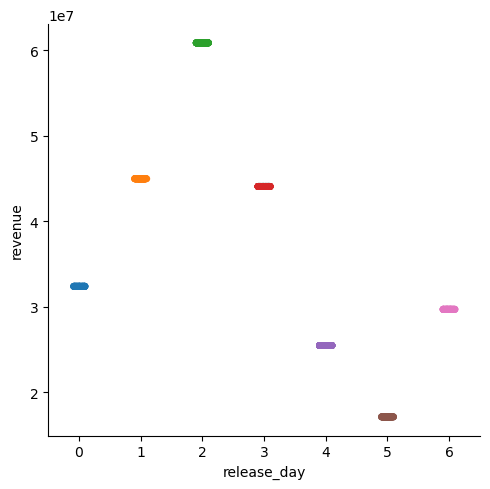

In [48]:
"""
可视化票房收入中值
"""
mean = [0,1,2,3,4,5,6]
for i in range(0,7):
    data =  train_data[train_data["release_day"] == i]
#     mean[i] = data['revenue'].mean()
    mean[i] = data['revenue'].median()
    
data = train_data.copy(deep = True)
for i in range(0,7):
    data.loc[data["release_day"] == i,'revenue'] = mean[i]
sns.catplot(x='release_day',y='revenue',data=data)

**通过可视化可以看出周三票房收入最高，周一、五、六、日四天票房相比于其余四天来说较为惨淡**  

**month**  

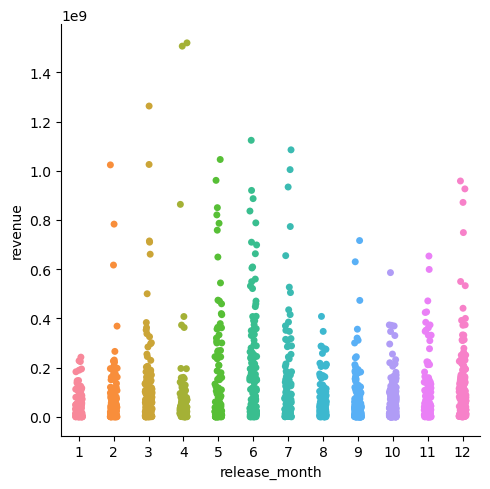

In [49]:
"""
可视化 release_month 与 revenue 之间的散点图
"""
sns.catplot(x='release_month',y='revenue',data=train_data)

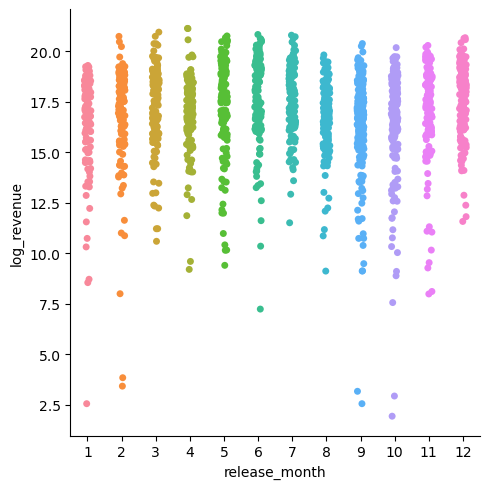

In [50]:
"""
可视化 release_month 与 log_revenue 之间的散点图
"""
sns.catplot(x='release_month',y='log_revenue',data=train_data)

<AxesSubplot:>

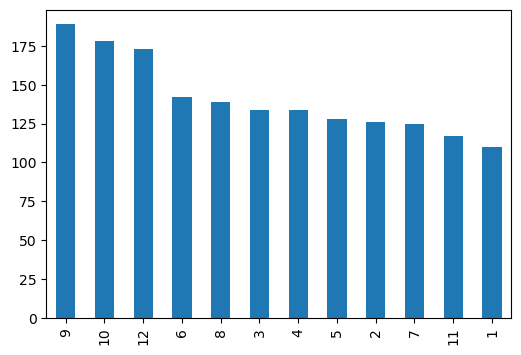

In [51]:
"""
可视化 release_month 的频数变化
"""
train_data["release_month"].value_counts().plot(kind="bar",figsize=(6,4))

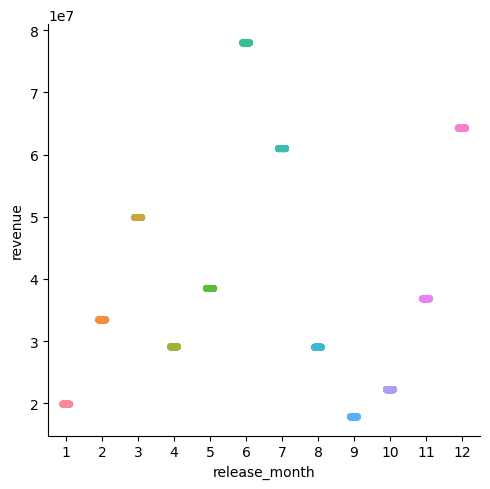

In [52]:
"""
可视化票房收入中值
"""
mean = [0]
for i in range(1,13):
    data =  train_data[train_data["release_month"] == i]
#     mean.append(data['revenue'].mean())
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(1,13):
    data.loc[data["release_month"] == i,'revenue'] = mean[i]
sns.catplot(x='release_month',y='revenue',data=data)

**通过可视化可以看出6、7、12等月份票房收入较高，1、9、10等月份票房收入相对低迷**  

**year**  

<AxesSubplot:xlabel='release_year', ylabel='revenue'>

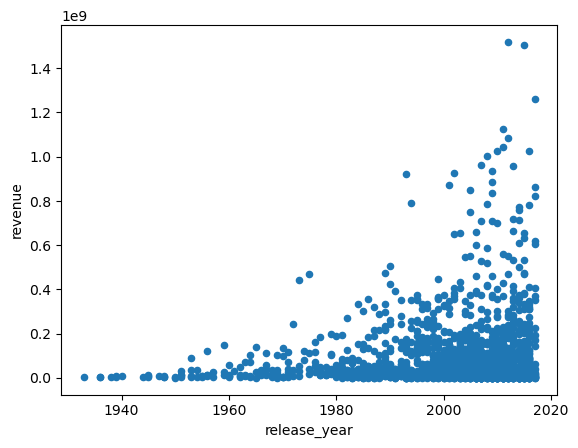

In [53]:
"""
可视化 release_year 与 revenue 之间的散点图
"""
train_data.plot.scatter('release_year','revenue')

(array([  7.,   8.,  21.,  26.,  32.,  71., 167., 293., 467., 603.]),
 array([1933. , 1941.4, 1949.8, 1958.2, 1966.6, 1975. , 1983.4, 1991.8,
        2000.2, 2008.6, 2017. ]),
 <BarContainer object of 10 artists>)

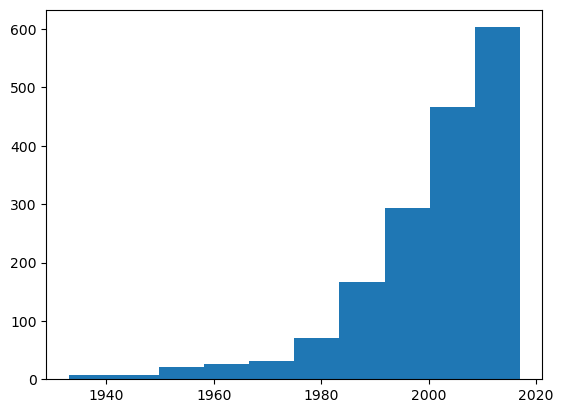

In [54]:
"""
可视化 release_year 的频数变化
"""
plt.hist('release_year',data=train_data)

In [55]:
#删除原有属性
train_data.drop(['release_date'], axis=1, inplace=True)
train_data.head(2)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   

                                              genres original_language  \
0                     [{'id': 35, 'name': 'Comedy'}]                en   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                en   

   popularity                               production_companies  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   113.00   

                           spoken_languages  ...  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  ...   
1  [{'iso_639_1': 'en', 'name': 'English'}]  ...   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                crew   revenue log_budget  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651      16.45   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435      17.50   

  log_revenue  log_popularity  has_homepage  release_year  release_day  \
0       16.33            2.02             0          2015            4   
1       18.37            2.22             0          2004            4   

   release_month  
0              2  
1              8  

[2 rows x 23 columns]

**(7) original_language**  

In [56]:
train_data['original_language'].isnull().sum()

0

In [57]:
for i,e in enumerate(train_data['original_language'][:5]):
    print(i,e)

0 en
1 en
2 en
3 hi
4 en


In [58]:
train_data["original_language"].value_counts()

en    1514
fr      32
hi      28
ru      24
ja      14
es      14
it      11
zh      11
de       9
ta       8
ko       7
cn       7
pt       3
da       2
sv       2
te       1
mr       1
fi       1
he       1
nb       1
vi       1
pl       1
nl       1
ro       1
Name: original_language, dtype: int64

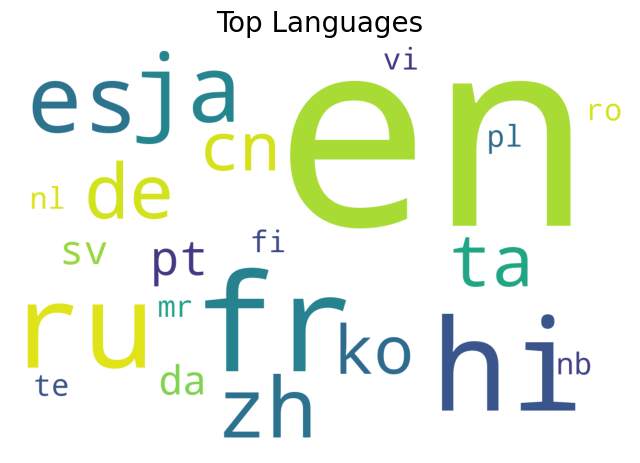

In [59]:
plt.figure(figsize = (8, 6))
text = ' '.join(train_data['original_language'])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Languages', fontsize=20)
plt.axis("off")
plt.show()

In [60]:
"""
加入 is_en 属性表示原始语言是否为'en'
"""
train_data['is_en'] = 0
train_data.loc[train_data['original_language'] == 'en', 'is_en'] = 1
train_data.head(2)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   

                                              genres original_language  \
0                     [{'id': 35, 'name': 'Comedy'}]                en   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                en   

   popularity                               production_companies  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   113.00   

                           spoken_languages  ...  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  ...   
1  [{'iso_639_1': 'en', 'name': 'English'}]  ...   

                                                crew   revenue log_budget  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651      16.45   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435      17.50   

  log_revenue log_popularity  has_homepage  release_year  release_day  \
0       16.33           2.02             0          2015            4   
1       18.37           2.22             0          2004            4   

   release_month  is_en  
0              2      1  
1              8      1  

[2 rows x 24 columns]

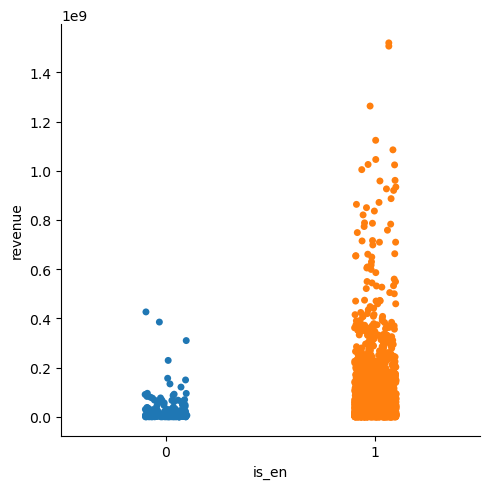

In [61]:
"""
可视化 is_en 与 revenue 之间的散点图
"""
sns.catplot(x='is_en',y='revenue',data=train_data)

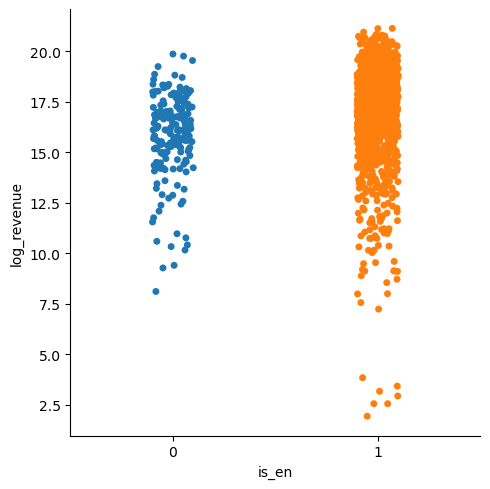

In [62]:
"""
可视化 is_en 与 log_revenue 之间的散点图
"""
sns.catplot(x='is_en',y='log_revenue',data=train_data)

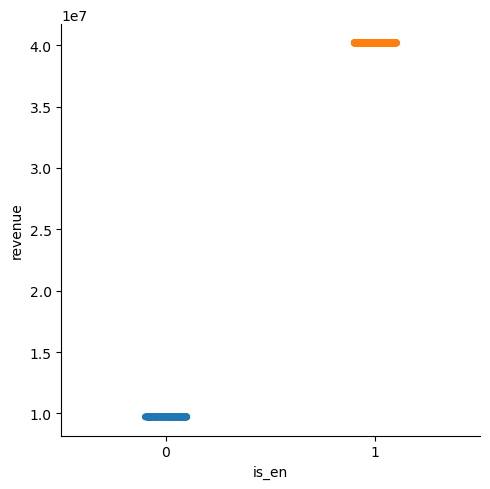

In [63]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["is_en"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["is_en"] == i,'revenue'] = mean[i]
sns.catplot(x='is_en',y='revenue',data=data)

In [64]:
train_data.drop(['original_language'], axis=1, inplace=True)
train_data.head(2)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   

                                              genres  popularity  \
0                     [{'id': 35, 'name': 'Comedy'}]        6.58   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...        8.25   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   113.00   

                           spoken_languages    status  ...  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  Released  ...   
1  [{'iso_639_1': 'en', 'name': 'English'}]  Released  ...   

                                                crew   revenue log_budget  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651      16.45   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435      17.50   

  log_revenue  log_popularity  has_homepage  release_year  release_day  \
0       16.33            2.02             0          2015            4   
1       18.37            2.22             0          2004            4   

   release_month  is_en  
0              2      1  
1              8      1  

[2 rows x 23 columns]

**通过可视化可以看出，原始语言是否为‘en’对票房收入的影响较大**  

**(8) belongs_to_collection**  

In [65]:
train_data['belongs_to_collection'].isnull().sum()

1291

In [66]:
train_data['collection'] = 0
train_data.loc[train_data['belongs_to_collection'].isnull() == False, 'collection'] = 1
train_data.head(2)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   

                                              genres  popularity  \
0                     [{'id': 35, 'name': 'Comedy'}]        6.58   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...        8.25   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   113.00   

                           spoken_languages    status  ...   revenue  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  Released  ...  12314651   
1  [{'iso_639_1': 'en', 'name': 'English'}]  Released  ...  95149435   

  log_budget log_revenue log_popularity  has_homepage  release_year  \
0      16.45       16.33           2.02             0          2015   
1      17.50       18.37           2.22             0          2004   

   release_day  release_month  is_en  collection  
0            4              2      1           1  
1            4              8      1           1  

[2 rows x 24 columns]

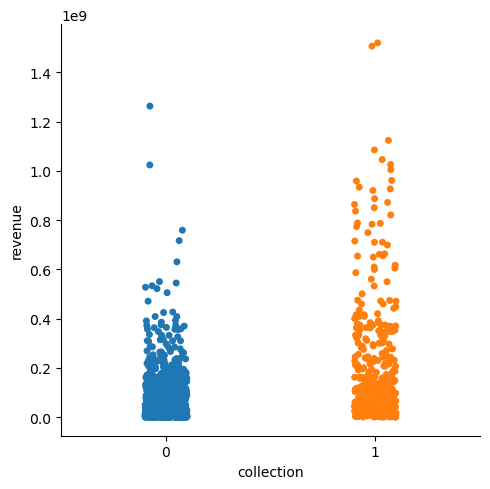

In [67]:
"""
可视化 collection 与 revenue 之间的散点图
"""
sns.catplot(x='collection',y='revenue',data=train_data)

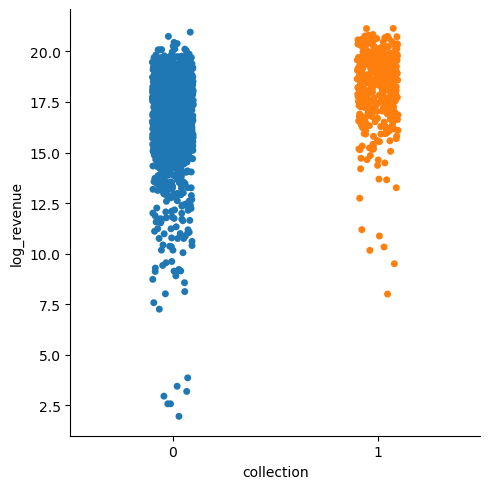

In [68]:
"""
可视化 collection 与 log_revenue 之间的散点图
"""
sns.catplot(x='collection',y='log_revenue',data=train_data)

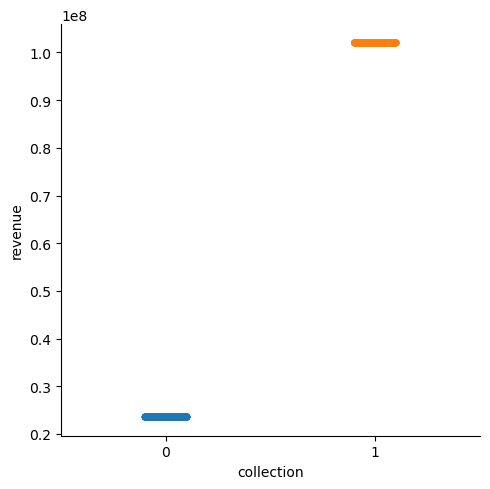

In [69]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["collection"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["collection"] == i,'revenue'] = mean[i]
sns.catplot(x='collection',y='revenue',data=data)

In [70]:
train_data.drop(['belongs_to_collection'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity                               production_companies  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   113.00   

                           spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  ...   revenue  \
0  The Laws of Space and Time are About to be Vio...  ...  12314651   
1  It can take a lifetime to find true love; she'...  ...  95149435   

  log_budget log_revenue  log_popularity  has_homepage  release_year  \
0      16.45       16.33            2.02             0          2015   
1      17.50       18.37            2.22             0          2004   

   release_day  release_month  is_en  collection  
0            4              2      1           1  
1            4              8      1           1  

[2 rows x 23 columns]

**通过可视化可以看出，该电影属于某一类收藏对票房收入的影响较大**  

**(9) production_countries**  

In [71]:
train_data['production_countries'].isnull().sum()

9

In [72]:
count=[]
for i in train_data['production_countries']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_prod_countries'] = count
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity                               production_companies  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...    93.00   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   113.00   

                           spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  ... log_budget  \
0  The Laws of Space and Time are About to be Vio...  ...      16.45   
1  It can take a lifetime to find true love; she'...  ...      17.50   

  log_revenue log_popularity  has_homepage  release_year  release_day  \
0       16.33           2.02             0          2015            4   
1       18.37           2.22             0          2004            4   

   release_month  is_en  collection  num_prod_countries  
0              2      1           1                   1  
1              8      1           1                   1  

[2 rows x 24 columns]

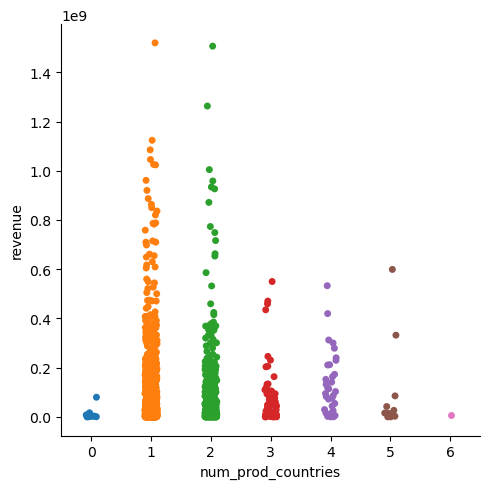

In [73]:
"""
可视化 num_prod_countries 与 revenue 之间的散点图
"""
sns.catplot(x='num_prod_countries',y='revenue',data=train_data)

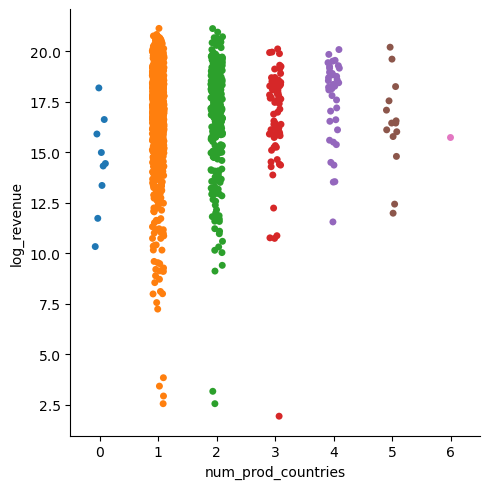

In [74]:
"""
可视化 num_prod_countries 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_prod_countries',y='log_revenue',data=train_data)

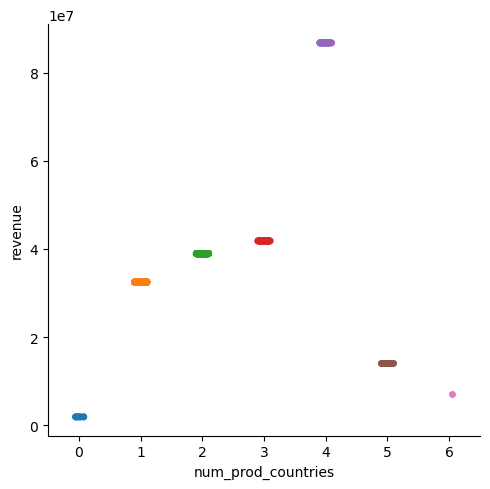

In [75]:
"""
可视化平均票房收入
"""
mean = []
for i in range(0,9):
    
    data =  train_data[train_data["num_prod_countries"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,9):
    data.loc[data["num_prod_countries"] == i,'revenue'] = mean[i]
sns.catplot(x='num_prod_countries',y='revenue',data=data)

In [76]:
train_data.drop(['production_countries'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity                               production_companies  runtime  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...    93.00   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   113.00   

                           spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  ... log_budget  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  ...      16.45   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  ...      17.50   

  log_revenue  log_popularity  has_homepage  release_year  release_day  \
0       16.33            2.02             0          2015            4   
1       18.37            2.22             0          2004            4   

   release_month  is_en  collection  num_prod_countries  
0              2      1           1                   1  
1              8      1           1                   1  

[2 rows x 23 columns]

**通过可视化可以看出，大部分电影由1或2个国家出品。当出品国家数在2~4个之间时往往票房收入不错** 

**(10) production_companies**  

In [77]:
train_data['production_companies'].isnull().sum()

42

In [78]:
count=[]
for i in train_data['production_companies']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_prod_companies'] = count
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity                               production_companies  runtime  \
0        6.58  [{'name': 'Paramount Pictures', 'id': 4}, {'na...    93.00   
1        8.25        [{'name': 'Walt Disney Pictures', 'id': 2}]   113.00   

                           spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  ... log_revenue  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  ...       16.33   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  ...       18.37   

  log_popularity  has_homepage  release_year  release_day  release_month  \
0           2.02             0          2015            4              2   
1           2.22             0          2004            4              8   

   is_en  collection  num_prod_countries  num_prod_companies  
0      1           1                   1                   3  
1      1           1                   1                   1  

[2 rows x 24 columns]

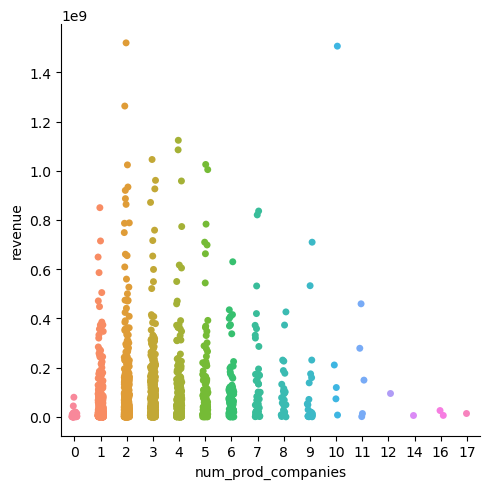

In [79]:
"""
可视化 num_prod_companies 与 revenue 之间的散点图
"""
sns.catplot(x='num_prod_companies',y='revenue',data=train_data)

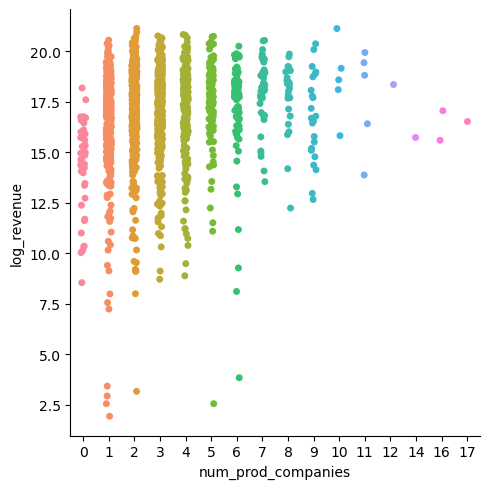

In [80]:
"""
可视化 num_prod_companies 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_prod_companies',y='log_revenue',data=train_data)

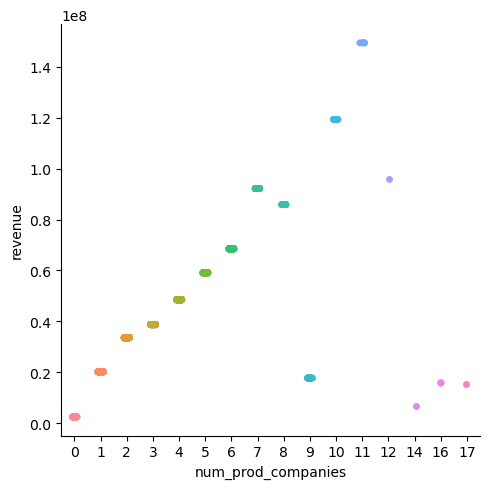

In [81]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,18):
    
    data =  train_data[train_data["num_prod_companies"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,18):
    data.loc[data["num_prod_companies"] == i,'revenue'] = mean[i]
sns.catplot(x='num_prod_companies',y='revenue',data=data)

In [82]:
train_data.drop(['production_companies'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime                          spoken_languages    status  \
0        6.58    93.00  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1        8.25   113.00  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                cast  ... log_revenue  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  ...       16.33   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  ...       18.37   

   log_popularity  has_homepage  release_year  release_day  release_month  \
0            2.02             0          2015            4              2   
1            2.22             0          2004            4              8   

   is_en  collection  num_prod_countries  num_prod_companies  
0      1           1                   1                   3  
1      1           1                   1                   1  

[2 rows x 23 columns]

**通过可视化可以看出，大部分电影由1-5个公司出品。当出品公司数在5-8个之间时往往票房收入不错** 

**(11) spoken_languages**  

In [83]:
train_data['spoken_languages'].isnull().sum()

3

In [84]:
count=[]
for i in train_data['spoken_languages']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_spoken_languages'] = count
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime                          spoken_languages    status  \
0        6.58    93.00  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1        8.25   113.00  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                cast  ... log_popularity  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  ...           2.02   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  ...           2.22   

   has_homepage  release_year  release_day  release_month  is_en  collection  \
0             0          2015            4              2      1           1   
1             0          2004            4              8      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  
0                   1                   3                     1  
1                   1                   1                     1  

[2 rows x 24 columns]

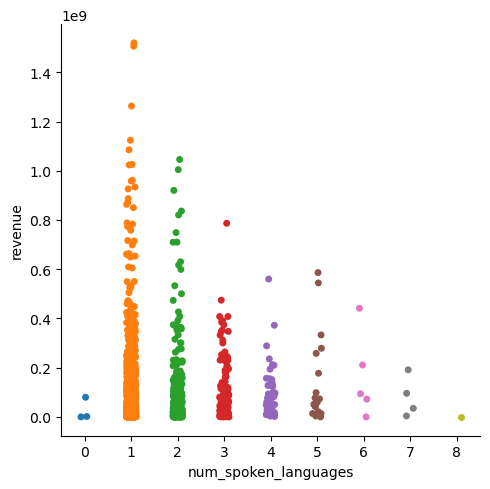

In [85]:
"""
可视化 num_spoken_languages 与 revenue 之间的散点图
"""
sns.catplot(x='num_spoken_languages',y='revenue',data=train_data)

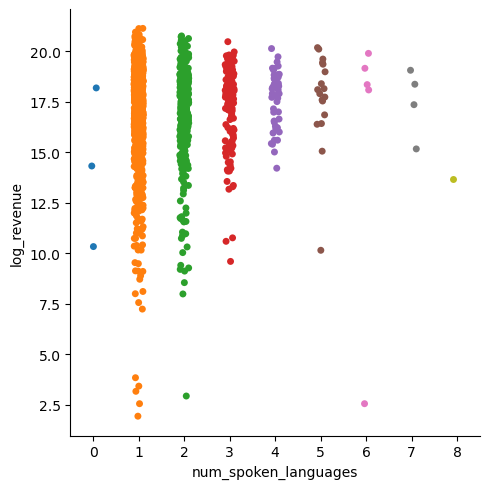

In [86]:
"""
可视化 num_spoken_languages 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_spoken_languages',y='log_revenue',data=train_data)

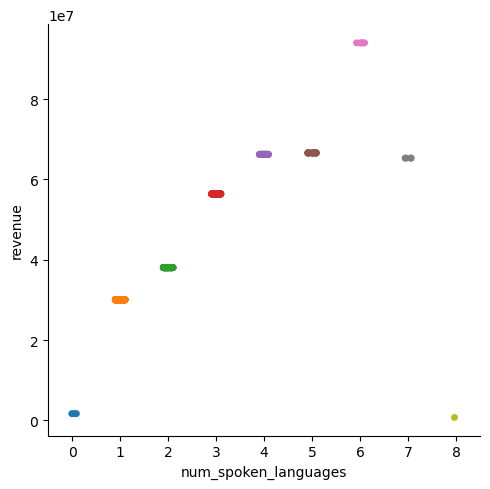

In [87]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,18):
    
    data =  train_data[train_data["num_spoken_languages"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,18):
    data.loc[data["num_spoken_languages"] == i,'revenue'] = mean[i]
sns.catplot(x='num_spoken_languages',y='revenue',data=data)

In [88]:
train_data.drop(['spoken_languages'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime    status  \
0        6.58    93.00  Released   
1        8.25   113.00  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                crew  ...  log_popularity  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  ...            2.02   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  ...            2.22   

   has_homepage  release_year  release_day  release_month  is_en  collection  \
0             0          2015            4              2      1           1   
1             0          2004            4              8      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  
0                   1                   3                     1  
1                   1                   1                     1  

[2 rows x 23 columns]

**通过可视化可以看出，大部分电影有1-2个输出语言。当输出语言数在4-6个之间时往往票房收入不错** 

**(12) cast**  

In [89]:
train_data['cast'].isnull().sum()

8

In [90]:
count=[]
for i in train_data['cast']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_cast'] = count
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime    status  \
0        6.58    93.00  Released   
1        8.25   113.00  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                crew  ...  has_homepage  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  ...             0   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  ...             0   

   release_year  release_day  release_month  is_en  collection  \
0          2015            4              2      1           1   
1          2004            4              8      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  num_cast  
0                   1                   3                     1        24  
1                   1                   1                     1        20  

[2 rows x 24 columns]

In [91]:
train_data['num_cast'].unique().max()

156

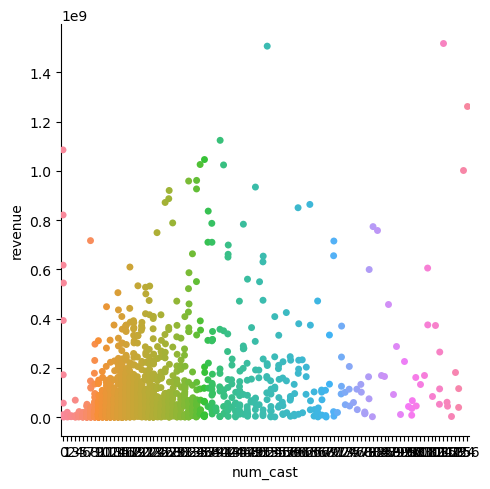

In [92]:
"""
可视化 num_cast 与 revenue 之间的散点图
"""
sns.catplot(x='num_cast',y='revenue',data=train_data)

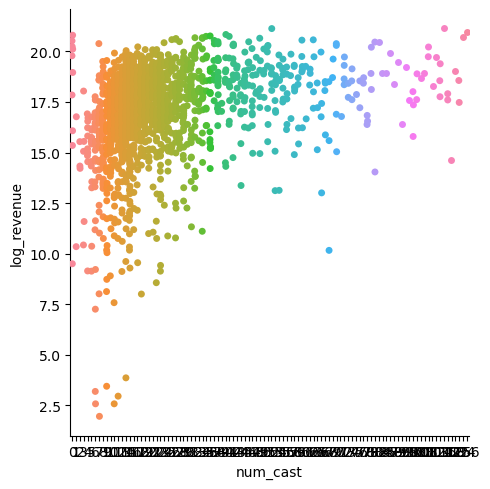

In [93]:
"""
可视化 num_cast 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_cast',y='log_revenue',data=train_data)

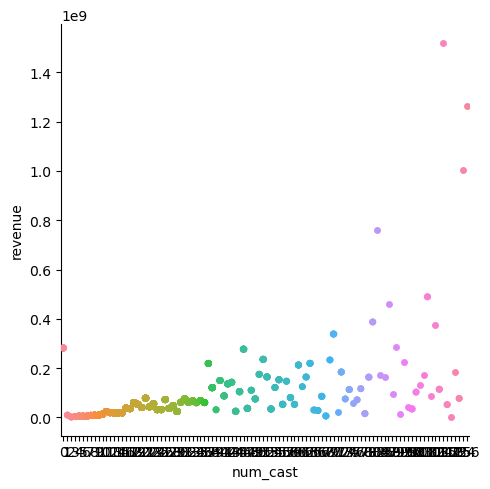

In [94]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,157):
    
    data =  train_data[train_data["num_cast"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,157):
    data.loc[data["num_cast"] == i,'revenue'] = mean[i]
sns.catplot(x='num_cast',y='revenue',data=data)

In [95]:
train_data.drop(['cast'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime    status  \
0        6.58    93.00  Released   
1        8.25   113.00  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                crew   revenue  ...  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  ...   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  ...   

   has_homepage  release_year  release_day  release_month  is_en  collection  \
0             0          2015            4              2      1           1   
1             0          2004            4              8      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  num_cast  
0                   1                   3                     1        24  
1                   1                   1                     1        20  

[2 rows x 23 columns]

**通过可视化可以看出，大部分电影演员数目在50以下。总体来看，演员数目多的电影票房收入一般较高。但没有明显的线性关系。** 

**(13) crew**  

In [96]:
train_data['crew'].isnull().sum()

9

In [97]:
count=[]
for i in train_data['crew']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_crew'] = count
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime    status  \
0        6.58    93.00  Released   
1        8.25   113.00  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                crew   revenue  ...  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  ...   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  ...   

   release_year  release_day  release_month  is_en  collection  \
0          2015            4              2      1           1   
1          2004            4              8      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  num_cast  \
0                   1                   3                     1        24   
1                   1                   1                     1        20   

   num_crew  
0        72  
1         9  

[2 rows x 24 columns]

In [98]:
train_data['num_crew'].unique().max()

194

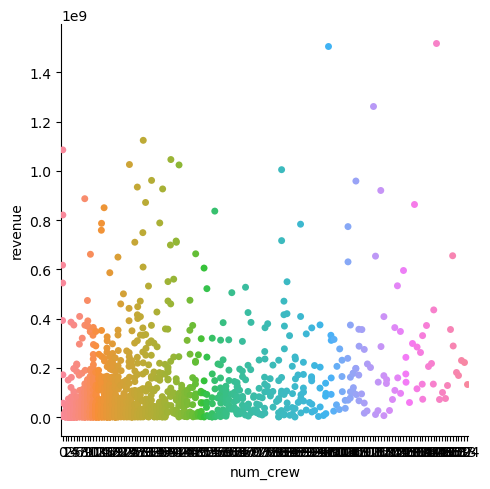

In [99]:
"""
可视化 num_crew 与 revenue 之间的散点图
"""
sns.catplot(x='num_crew',y='revenue',data=train_data)

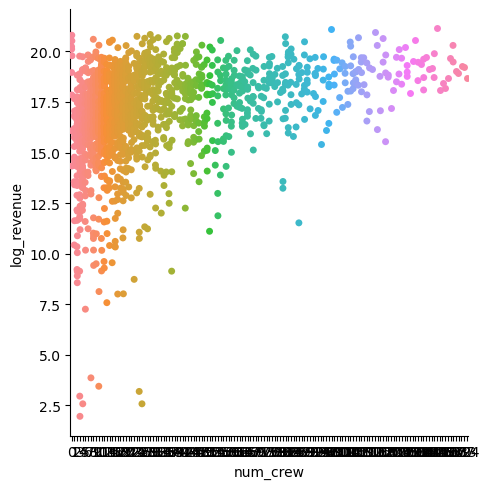

In [100]:
"""
可视化 num_crew 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_crew',y='log_revenue',data=train_data)

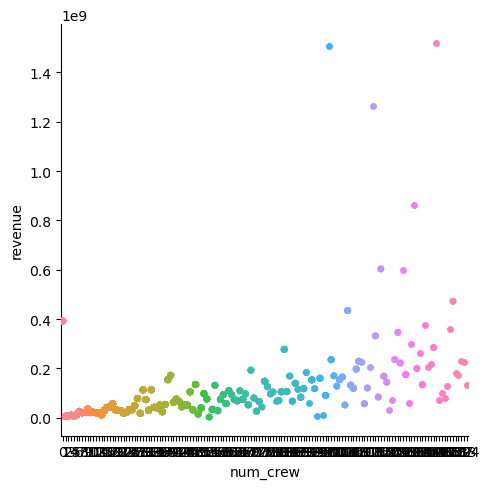

In [101]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,195):
    
    data =  train_data[train_data["num_crew"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,195):
    data.loc[data["num_crew"] == i,'revenue'] = mean[i]
sns.catplot(x='num_crew',y='revenue',data=data)

In [102]:
train_data.drop(['crew'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime    status  \
0        6.58    93.00  Released   
1        8.25   113.00  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   

                                            Keywords   revenue  log_budget  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  12314651       16.45   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  95149435       17.50   

   ...  release_year  release_day  release_month  is_en  collection  \
0  ...          2015            4              2      1           1   
1  ...          2004            4              8      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  num_cast  \
0                   1                   3                     1        24   
1                   1                   1                     1        20   

   num_crew  
0        72  
1         9  

[2 rows x 23 columns]

**总体来看，剧组人数多的电影票房收入一般较高。但没有明显的线性关系。** 

**(14) status**  

In [103]:
train_data['status'].isnull().sum()

0

In [104]:
train_data['status'].unique()

array(['Released'], dtype=object)

In [105]:
# 查看状态为 'Rumored' 的电影数
data = train_data[train_data['status']=='Rumored']
data['status'].count()

0

**该属性特殊值极少，对分析无用。删除该属性**  

In [106]:
train_data.drop(['status'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime                                            tagline  \
0        6.58    93.00  The Laws of Space and Time are About to be Vio...   
1        8.25   113.00  It can take a lifetime to find true love; she'...   

                                            Keywords   revenue  log_budget  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  12314651       16.45   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  95149435       17.50   

   log_revenue  ...  release_year  release_day  release_month  is_en  \
0        16.33  ...          2015            4              2      1   
1        18.37  ...          2004            4              8      1   

   collection  num_prod_countries  num_prod_companies  num_spoken_languages  \
0           1                   1                   3                     1   
1           1                   1                   1                     1   

   num_cast  num_crew  
0        24        72  
1        20         9  

[2 rows x 22 columns]

**(15) tagline**  

In [107]:
train_data['tagline'].isnull().sum()

212

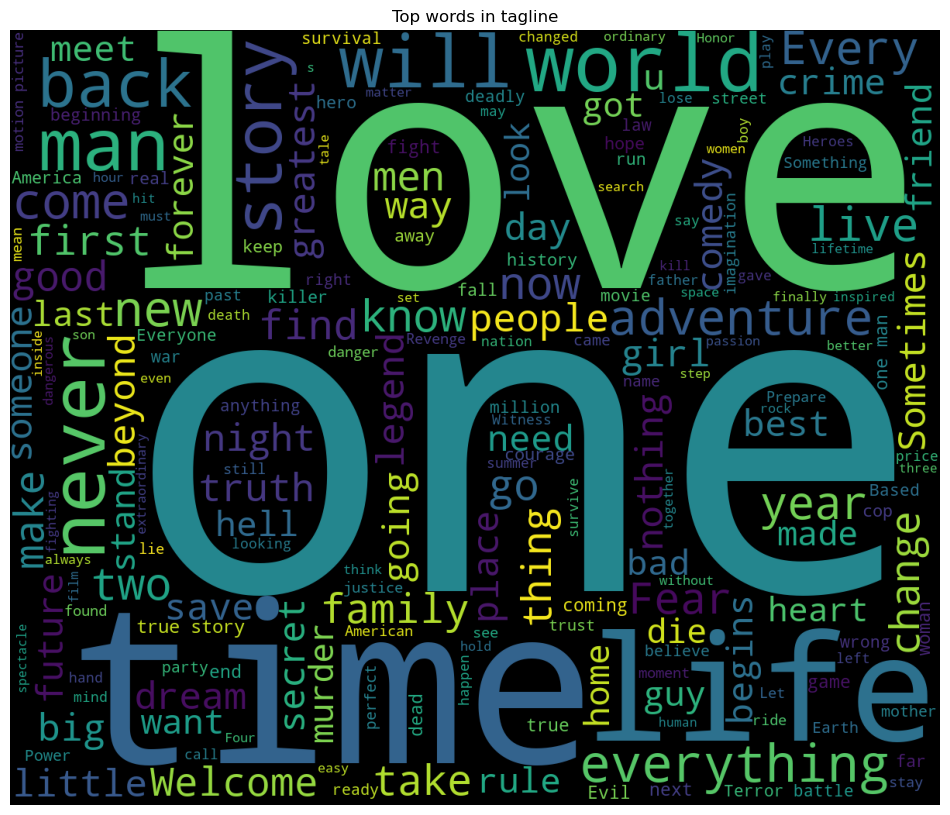

In [108]:
plt.figure(figsize = (12, 12))
text = ' '.join(train_data['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

In [109]:
"""
构建二值属性
"""
train_data['has_tagline'] = 0
train_data.loc[train_data['tagline'].isnull() == False, 'has_tagline'] = 1
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime                                            tagline  \
0        6.58    93.00  The Laws of Space and Time are About to be Vio...   
1        8.25   113.00  It can take a lifetime to find true love; she'...   

                                            Keywords   revenue  log_budget  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  12314651       16.45   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  95149435       17.50   

   log_revenue  ...  release_day  release_month  is_en  collection  \
0        16.33  ...            4              2      1           1   
1        18.37  ...            4              8      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  num_cast  \
0                   1                   3                     1        24   
1                   1                   1                     1        20   

   num_crew  has_tagline  
0        72            1  
1         9            1  

[2 rows x 23 columns]

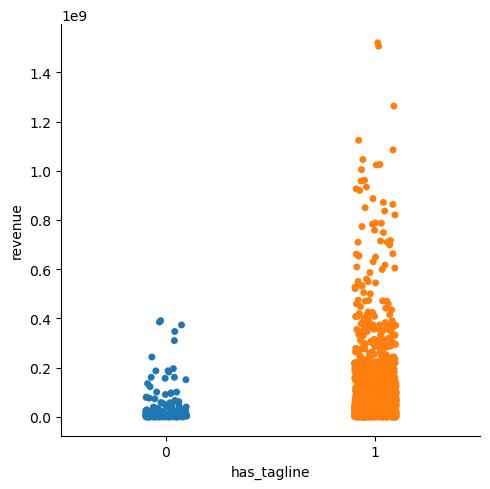

In [110]:
"""
可视化 has_tagline 与 revenue 之间的散点图
"""
sns.catplot(x='has_tagline',y='revenue',data=train_data)

In [111]:
has_tagline = train_data[train_data['has_tagline'] == 1]
has_tagline['revenue'].describe()

count         1483.00
mean     102795760.43
std      166603905.08
min              6.00
25%       11438866.00
50%       41744718.00
75%      119856523.50
max     1519557910.00
Name: revenue, dtype: float64

In [112]:
no_tagline = train_data[train_data['has_tagline'] == 0]
no_tagline['revenue'].describe()

count         212.00
mean     31030577.20
std      65850998.54
min          1938.00
25%       2382284.75
50%       8235643.00
75%      21474182.00
max     391081192.00
Name: revenue, dtype: float64

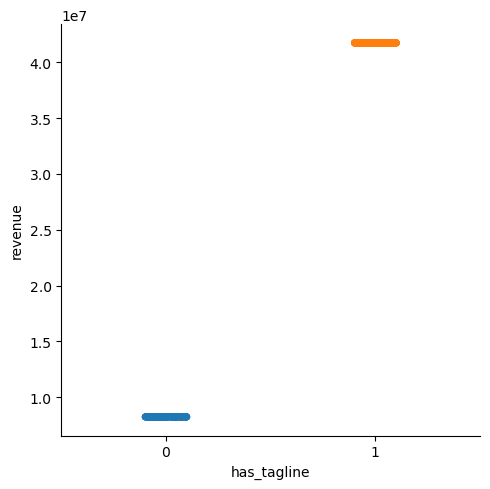

In [113]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["has_tagline"] == i]
    mean.append(data['revenue'].median())

    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["has_tagline"] == i,'revenue'] = mean[i]
sns.catplot(x='has_tagline',y='revenue',data=data)

In [114]:
#tagline作为无效属性，删除该属性
train_data.drop(['tagline'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime                                           Keywords  \
0        6.58    93.00  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1        8.25   113.00  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

    revenue  log_budget  log_revenue  log_popularity  ...  release_day  \
0  12314651       16.45        16.33            2.02  ...            4   
1  95149435       17.50        18.37            2.22  ...            4   

   release_month  is_en  collection  num_prod_countries  num_prod_companies  \
0              2      1           1                   1                   3   
1              8      1           1                   1                   1   

   num_spoken_languages  num_cast  num_crew  has_tagline  
0                     1        24        72            1  
1                     1        20         9            1  

[2 rows x 22 columns]

**从散点图和数据特征来看，有标语的电影票房一般要高于无标语的电影**  

**(16) Keywords**  

In [115]:
train_data['Keywords'].isnull().sum()

95

In [116]:
Keywords = []
repeated_revenues = []
train_data['keywords'] = ""
for i in range(len(train_data)):
    if train_data['Keywords'][i] == train_data['Keywords'][i]:
        for Keyword in eval(train_data['Keywords'][i]):
            if train_data['keywords'][i] == "":
                train_data['keywords'][i] = Keyword['name']
            else :          
                train_data['keywords'][i] = train_data['keywords'][i] + "，" + Keyword['name']
train_data['keywords'].head()

C:\Users\26947\AppData\Local\Temp\ipykernel_4144\2348324258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['keywords'][i] = Keyword['name']
C:\Users\26947\AppData\Local\Temp\ipykernel_4144\2348324258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['keywords'][i] = train_data['keywords'][i] + "，" + Keyword['name']


0      time travel，sequel，hot tub，duringcreditsstinger
1             coronation，duty，marriage，falling in love
2    jazz，obsession，conservatory，music teacher，new ...
3    mystery，bollywood，police corruption，crime，indi...
4                                                     
Name: keywords, dtype: object

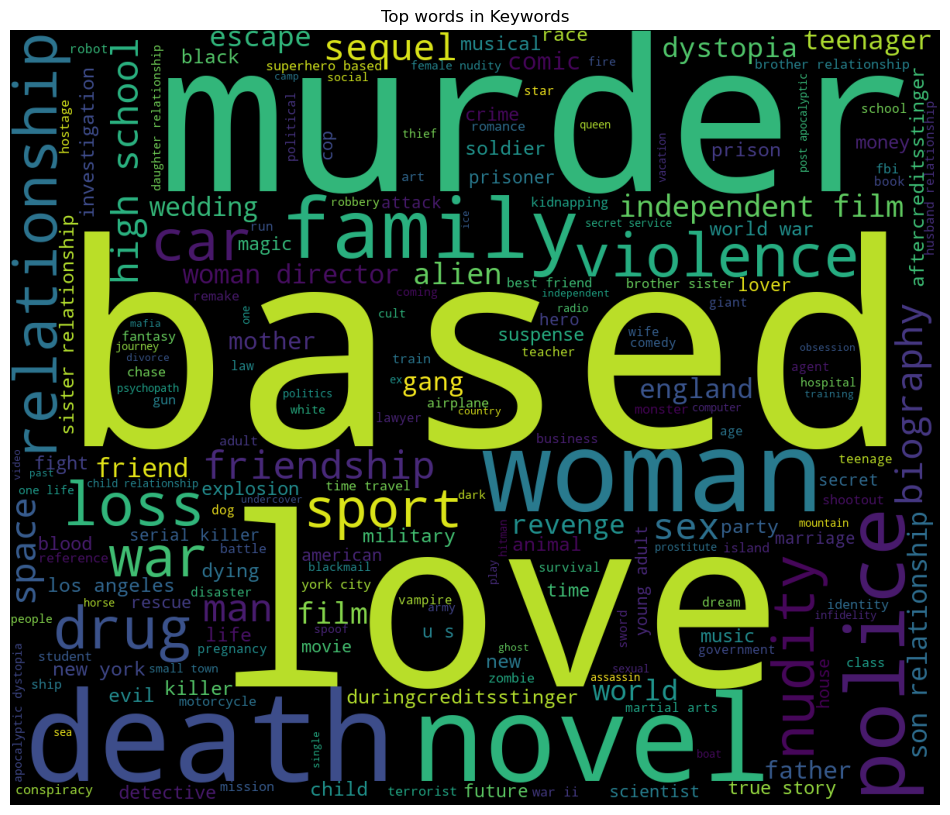

In [117]:
plt.figure(figsize = (12, 12))
text = ''.join(train_data['keywords'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in Keywords')
plt.axis("off")
plt.show()

In [118]:
count=[]
for i in train_data['Keywords']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_keywords'] = count
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime                                           Keywords  \
0        6.58    93.00  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1        8.25   113.00  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

    revenue  log_budget  log_revenue  log_popularity  ...  is_en  collection  \
0  12314651       16.45        16.33            2.02  ...      1           1   
1  95149435       17.50        18.37            2.22  ...      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  num_cast  \
0                   1                   3                     1        24   
1                   1                   1                     1        20   

   num_crew  has_tagline                                         keywords  \
0        72            1  time travel，sequel，hot tub，duringcreditsstinger   
1         9            1         coronation，duty，marriage，falling in love   

   num_keywords  
0             4  
1             4  

[2 rows x 24 columns]

In [119]:
train_data['num_keywords'].unique().max()

43

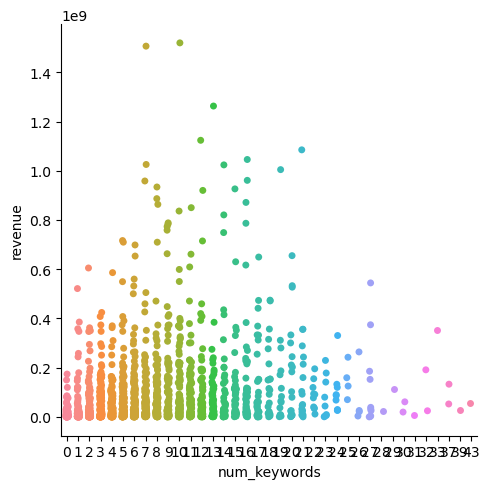

In [120]:
"""
可视化 num_keywords 与 revenue 之间的散点图
"""
sns.catplot(x='num_keywords',y='revenue',data=train_data)

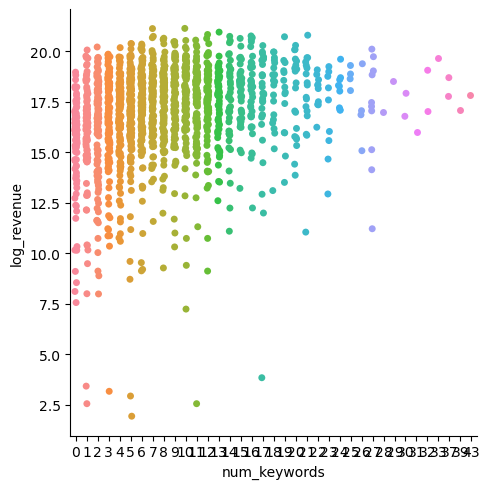

In [121]:
"""
可视化 num_keywords 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_keywords',y='log_revenue',data=train_data)

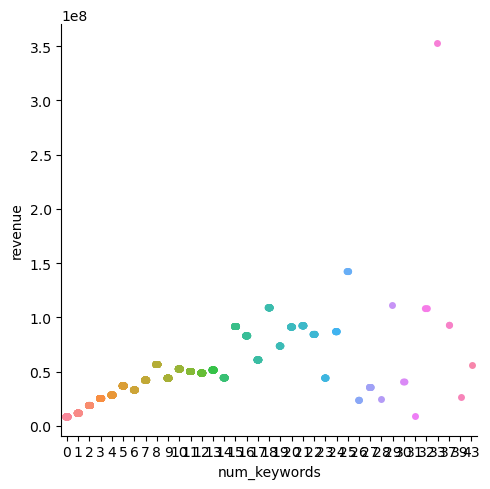

In [122]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,150):
    
    data =  train_data[train_data["num_keywords"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,150):
    data.loc[data["num_keywords"] == i,'revenue'] = mean[i]
sns.catplot(x='num_keywords',y='revenue',data=data)

In [123]:
#Keywords作为无效属性，删除该属性
train_data.drop(['Keywords'], axis=1, inplace=True)
train_data.drop(['keywords'], axis=1, inplace=True)
train_data.head(2)

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime   revenue  log_budget  log_revenue  log_popularity  \
0        6.58    93.00  12314651       16.45        16.33            2.02   
1        8.25   113.00  95149435       17.50        18.37            2.22   

   has_homepage  ...  release_month  is_en  collection  num_prod_countries  \
0             0  ...              2      1           1                   1   
1             0  ...              8      1           1                   1   

   num_prod_companies  num_spoken_languages  num_cast  num_crew  has_tagline  \
0                   3                     1        24        72            1   
1                   1                     1        20         9            1   

   num_keywords  
0             4  
1             4  

[2 rows x 22 columns]

**总体来看，Keywords相对适中的电影票房收入一般较高。** 

**(17) genres**  

In [124]:
train_data['genres'].isnull().sum()

2

In [125]:
genres = []
repeated_revenues = []
for i in range(len(train_data)):
    if train_data['genres'][i] == train_data['genres'][i]:
        movie_genre = [genre['name'] for genre in eval(train_data['genres'][i])]
        genres.extend(movie_genre)
        repeated_revenues.extend([train_data['revenue'][i]]*len(movie_genre))

genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = repeated_revenues

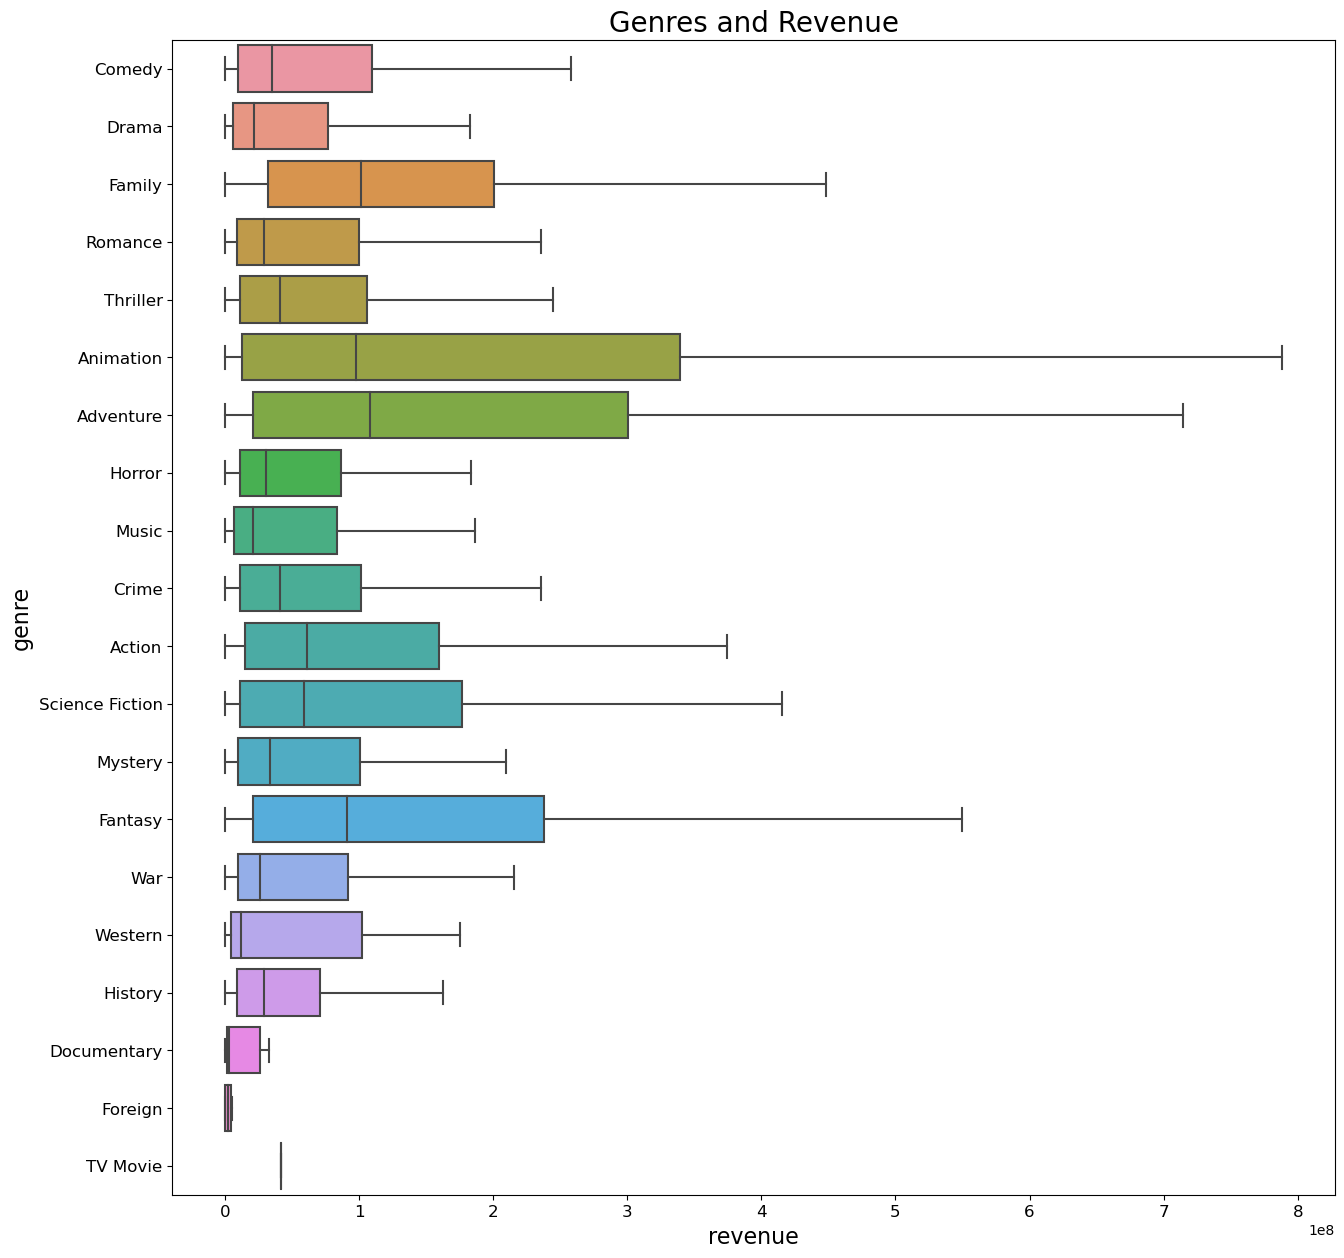

In [126]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('genre', fontsize=16)
sns.boxplot(ax=ax, x=repeated_revenues, y=genres, showfliers=False, orient='h')
plt.show()

**从图中可以看出，Adventure，Animation，Fantasy，Family，Action 和 Science_Fiction 类型的电影票房一般比较高**  

In [127]:
"""
尝试将 genres 属性转换为 is_popular_genres 属性
"""

train_data['is_popular_genres'] = 0
for i in range(len(train_data)):
    if train_data['genres'][i] == train_data['genres'][i]:
        for genre in eval(train_data['genres'][i]):
            if genre['name'] == "Adventure":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Animation":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Fantasy":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Family":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Action":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Science_Fiction":
                train_data['is_popular_genres'][i] += 1
            else:
                continue
train_data.head(2)

C:\Users\26947\AppData\Local\Temp\ipykernel_4144\621002970.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['is_popular_genres'][i] += 1
C:\Users\26947\AppData\Local\Temp\ipykernel_4144\621002970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['is_popular_genres'][i] += 1
C:\Users\26947\AppData\Local\Temp\ipykernel_4144\621002970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['is_popular_

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

   popularity  runtime   revenue  log_budget  log_revenue  log_popularity  \
0        6.58    93.00  12314651       16.45        16.33            2.02   
1        8.25   113.00  95149435       17.50        18.37            2.22   

   has_homepage  ...  is_en  collection  num_prod_countries  \
0             0  ...      1           1                   1   
1             0  ...      1           1                   1   

   num_prod_companies  num_spoken_languages  num_cast  num_crew  has_tagline  \
0                   3                     1        24        72            1   
1                   1                     1        20         9            1   

   num_keywords  is_popular_genres  
0             4                  0  
1             4                  1  

[2 rows x 23 columns]

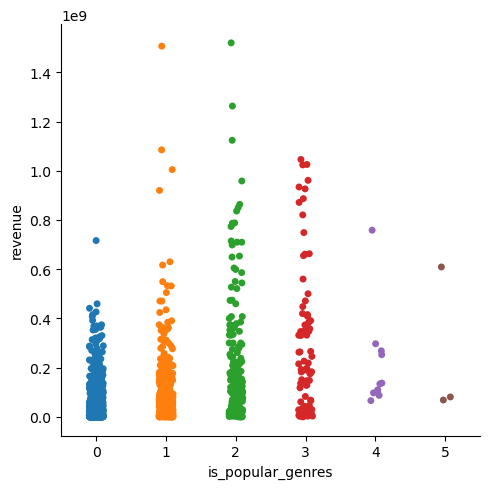

In [128]:
"""
可视化 is_popular_genres 与 revenue 之间的散点图
"""
sns.catplot(x='is_popular_genres',y='revenue',data=train_data)

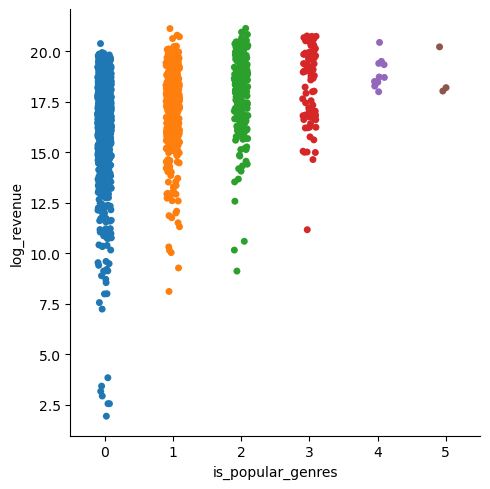

In [129]:
"""
可视化 is_popular_genres 与 log_revenue 之间的散点图
"""
sns.catplot(x='is_popular_genres',y='log_revenue',data=train_data)

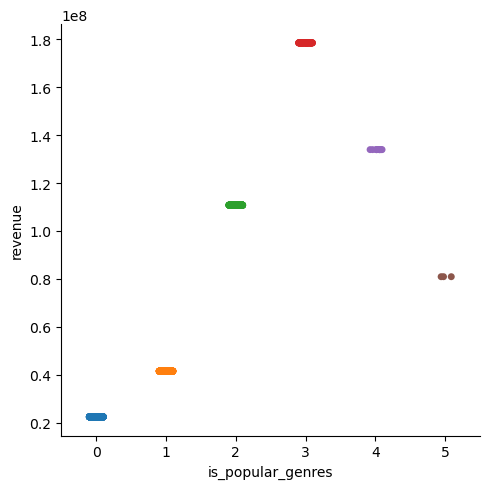

In [130]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,150):
    
    data =  train_data[train_data["is_popular_genres"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,150):
    data.loc[data["is_popular_genres"] == i,'revenue'] = mean[i]
sns.catplot(x='is_popular_genres',y='revenue',data=data)

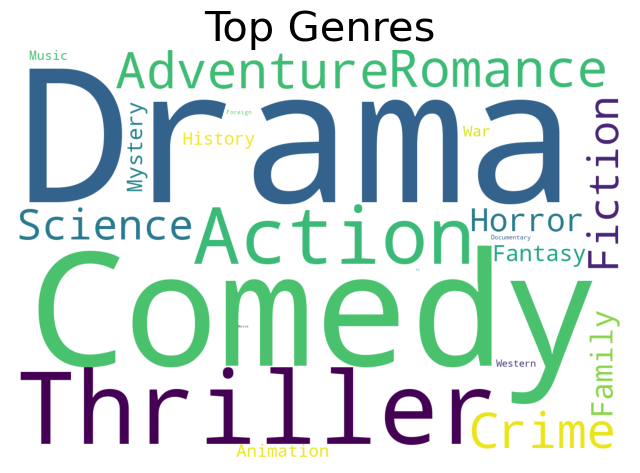

In [131]:
plt.figure(figsize = (8, 6))
text = ' '.join(genres)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=30)
plt.axis("off")
plt.show()

In [132]:
#Keywords作为无效属性，删除该属性
train_data.drop(['genres'], axis=1, inplace=True)
train_data.head(2)

id    budget  popularity  runtime   revenue  log_budget  log_revenue  \
0   1  14000000        6.58    93.00  12314651       16.45        16.33   
1   2  40000000        8.25   113.00  95149435       17.50        18.37   

   log_popularity  has_homepage  release_year  ...  is_en  collection  \
0            2.02             0          2015  ...      1           1   
1            2.22             0          2004  ...      1           1   

   num_prod_countries  num_prod_companies  num_spoken_languages  num_cast  \
0                   1                   3                     1        24   
1                   1                   1                     1        20   

   num_crew  has_tagline  num_keywords  is_popular_genres  
0        72            1             4                  0  
1         9            1             4                  1  

[2 rows x 22 columns]

**结合可视化可以看出，电影同时符合多个流行流派时，票房收入更高一些**  

## 数据相关性分析

In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1695 non-null   int64  
 1   budget                1695 non-null   int64  
 2   popularity            1695 non-null   float64
 3   runtime               1695 non-null   float64
 4   revenue               1695 non-null   int64  
 5   log_budget            1695 non-null   float64
 6   log_revenue           1695 non-null   float64
 7   log_popularity        1695 non-null   float64
 8   has_homepage          1695 non-null   int64  
 9   release_year          1695 non-null   int64  
 10  release_day           1695 non-null   int32  
 11  release_month         1695 non-null   int32  
 12  is_en                 1695 non-null   int64  
 13  collection            1695 non-null   int64  
 14  num_prod_countries    1695 non-null   int64  
 15  num_prod_companies   

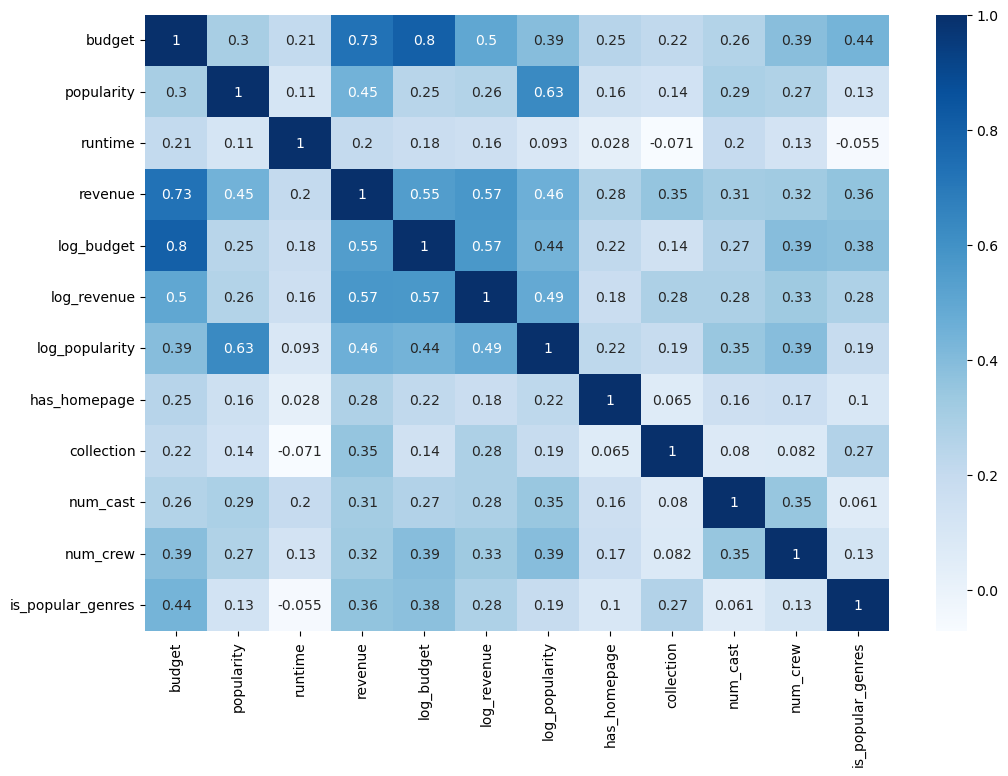

In [134]:
corr =train_data.corr()
top_feature = corr.index[abs(corr['revenue'])>0.2]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = train_data[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()

In [135]:
#删除 log_budget， log_revenue， log_popularity等冗余属性，再次计算相似度
train_data.drop(['log_budget'], axis=1, inplace=True)
train_data.drop(['log_revenue'], axis=1, inplace=True)
train_data.drop(['log_popularity'], axis=1, inplace=True)
train_data.head(2)

id    budget  popularity  runtime   revenue  has_homepage  release_year  \
0   1  14000000        6.58    93.00  12314651             0          2015   
1   2  40000000        8.25   113.00  95149435             0          2004   

   release_day  release_month  is_en  collection  num_prod_countries  \
0            4              2      1           1                   1   
1            4              8      1           1                   1   

   num_prod_companies  num_spoken_languages  num_cast  num_crew  has_tagline  \
0                   3                     1        24        72            1   
1                   1                     1        20         9            1   

   num_keywords  is_popular_genres  
0             4                  0  
1             4                  1

In [136]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1695 non-null   int64  
 1   budget                1695 non-null   int64  
 2   popularity            1695 non-null   float64
 3   runtime               1695 non-null   float64
 4   revenue               1695 non-null   int64  
 5   has_homepage          1695 non-null   int64  
 6   release_year          1695 non-null   int64  
 7   release_day           1695 non-null   int32  
 8   release_month         1695 non-null   int32  
 9   is_en                 1695 non-null   int64  
 10  collection            1695 non-null   int64  
 11  num_prod_countries    1695 non-null   int64  
 12  num_prod_companies    1695 non-null   int64  
 13  num_spoken_languages  1695 non-null   int64  
 14  num_cast              1695 non-null   int64  
 15  num_crew             

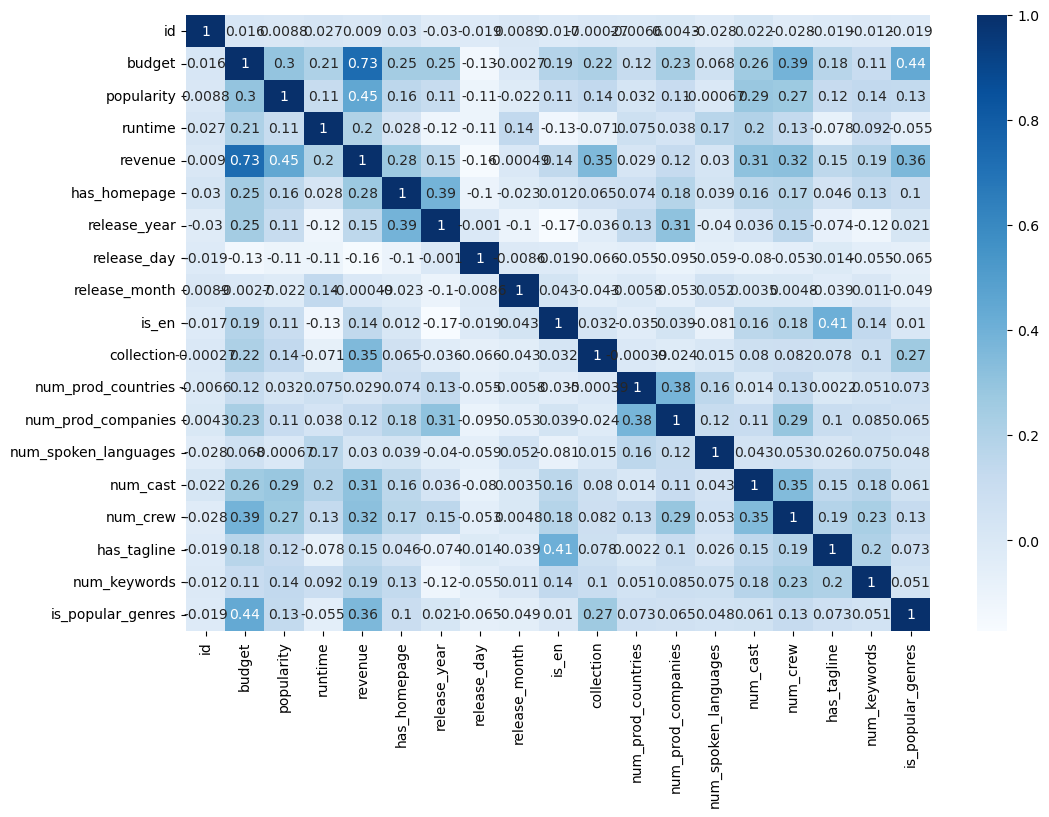

In [137]:
corr =train_data.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(corr,cmap='Blues', annot=True)
plt.show()

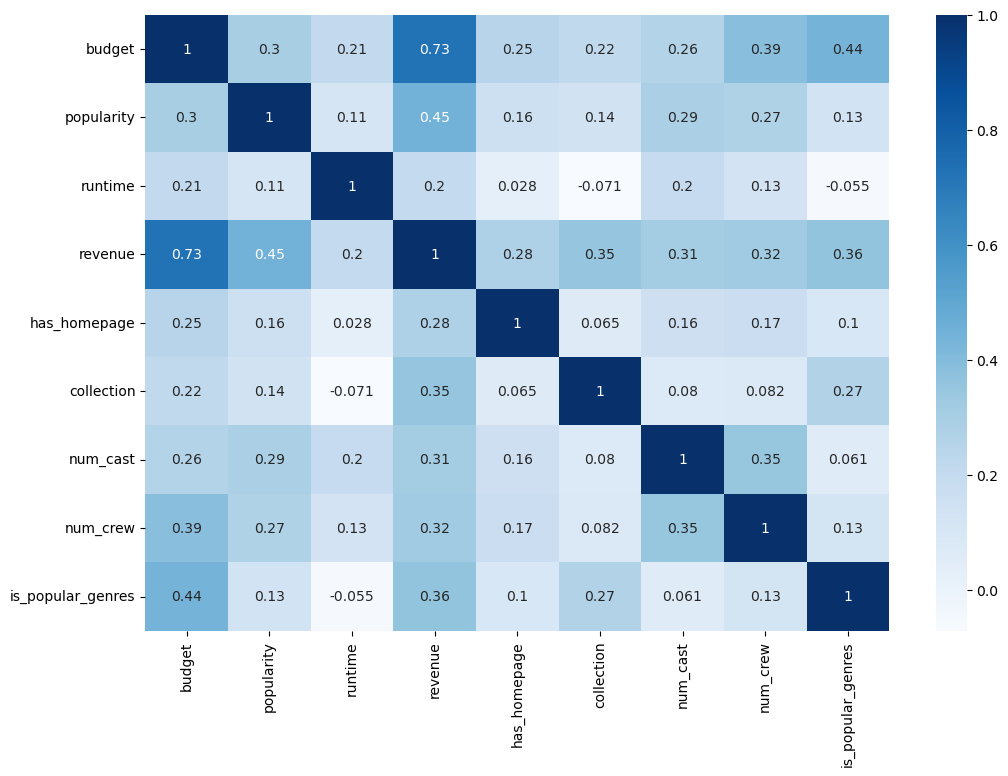

In [138]:
corr =train_data.corr()
top_feature = corr.index[abs(corr['revenue'])>0.2]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = train_data[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()